MEMAHAMI KONVOLUSI

Memahami dan mengkode dengan Python

In [ ]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]


y = np.convolve(x, h)
y

array([ 6, 11, 14,  5,  0])

In [ ]:
print("Bandingkan dengan nilai berikut dari Python: y[0] = {0} ; y[1] = {1} ; y[2] = {2} ; y[3] = {3} ; y[4] = {4}".format(y[0], y[1], y[2], y[3], y[4]))

Bandingkan dengan nilai berikut dari Python: y[0] = 6 ; y[1] = 11 ; y[2] = 14 ; y[3] = 5 ; y[4] = 0


In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full")  # sekarang, karena padding nol, dimensi akhir array menjadi lebih besar
y

array([ 6, 14, 34, 34,  8])


Memahami operasi secara visual dengan "sama"

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")  # itu sama dengan bantalan nol, tetapi dengan mengembalikan keluaran dengan panjang yang sama dengan maks x atau h
y

array([ 6, 14, 34, 34])

Memahami operasi secara visual tanpa padding

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")   # valid mengembalikan output dengan panjang max(x, h) - min(x, h) + 1, ini untuk memastikan bahwa nilai di luar batas
                                # h tidak akan digunakan dalam perhitungan konvolusi
                                # pada contoh berikutnya kita akan memahami mengapa kita menggunakan argumen valid
y

array([14, 34, 34])

In [ ]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# Argumen 'valid' menyatakan bahwa output hanya terdiri dari elemen-elemen tersebut
# yang tidak bergantung pada zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [ ]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# Outputnya adalah konvolusi linier diskrit penuh dari input.
# Ini akan menggunakan nol untuk melengkapi matriks masukan

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# Outputnya adalah konvolusi linier diskrit penuh dari input.
# Ini akan menggunakan nol untuk melengkapi matriks masukan


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# Argumen 'valid' menyatakan bahwa output hanya terdiri dari elemen-elemen tersebut
# yang tidak bergantung pada zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


Menginstal TensorFlow

In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.15.0

  Using cached grpcio-1.24.3.tar.gz (14.0 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for grpcio
  Running setup.py clean for grpcio
Failed to build grpcio
ERROR: Could not build wheels for grpcio, which is required to install pyproject.toml-based projects


In [ ]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.2.0':
    print(tf.__version__)
    printmd('<<<<<!!!!! ERROR !!!! harap tingkatkan ke TensorFlow 2.2.0, atau mulai ulang Kernel Anda (Kernel->Restart & Clear Output)>>>>>')

2.15.0


# <span style="color:red"><<<<<!!!!! ERROR !!!! harap tingkatkan ke TensorFlow 2.2.0, atau mulai ulang Kernel Anda (Kernel->Restart & Clear Output)>>>>></span>

In [ ]:
input = tf.Variable(tf.random.normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random.normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

print("Input \n")
print('{0} \n'.format(input.numpy()))
print("Filter/Kernel \n")
print('{0} \n'.format(filter.numpy()))
print("Result/Feature Map with valid positions \n")
print(op.numpy())
print('\n')
print("Result/Feature Map with padding \n")
print(op2.numpy())

Convolution applied on images

In [15]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7A2906FBD930> 


After conversion to numerical representation: 

 array([[ 64,  71,  65, ...,  49,  47,  48],
       [ 68,  71,  64, ...,  54,  52,  51],
       [ 65,  69,  66, ...,  54,  50,  55],
       ...,
       [ 22,  23,  23, ..., 184, 170, 155],
       [ 18,  21,  26, ..., 179, 166, 153],
       [ 27,  22,  21, ..., 170, 159, 149]], dtype=uint8)

 Input image converted to gray scale: 



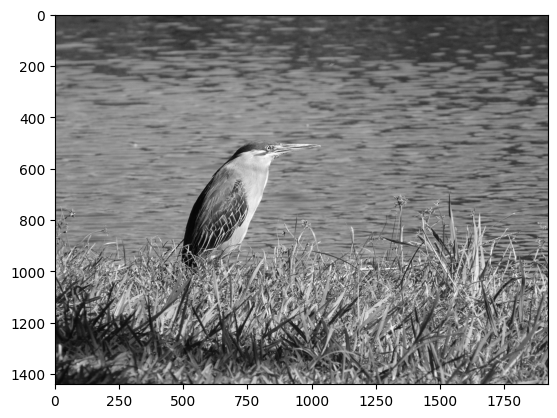

In [17]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('bird.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [ ]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

In [ ]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


In [ ]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

In [ ]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

In [20]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document number3.jpg


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7A290ADD36D0> 


After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Input image converted to gray scale: 



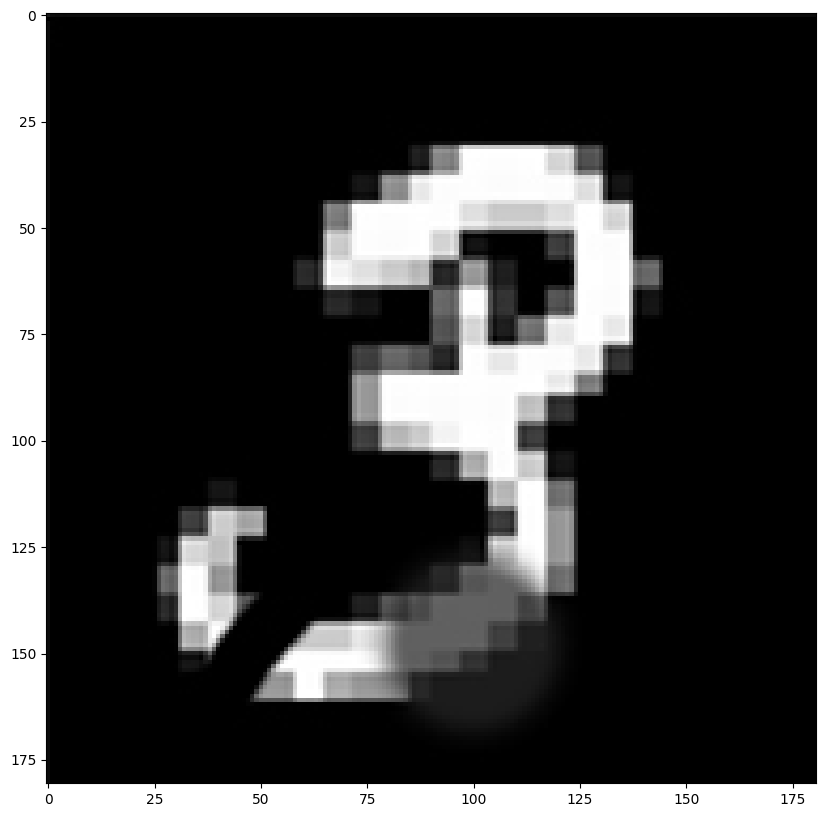

In [21]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('number3.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

In [ ]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')
